# 📈 Regression problems


<center><img src="https://miro.medium.com/max/1400/1*BT-K3d_tspyeePbQzMzE7g.png"></center>


Linear Regression is a method used to define a relationship between a dependent variable $(Y)$ and independent variable $(X)$.

 Which is simply written as :

<center><img src="https://miro.medium.com/max/722/1*nejpuvlh1MbMGQtve_1ztQ.png"></center>

Where $y$ is the dependent variable, $m$ is the scale factor or coefficient, $b$ being the **bias coefficient** and $X$ being the independent variable. The bias coefficient gives an extra degree of freedom to this model. The goal is to draw the line of best fit between $X$ and $Y$ which estimates the relationship between $X$ and $Y$.

where:

- $y$ is the value we're trying to predict

- $m$ is the slope of the line.

- $x$ is our input feature.

- $b$ is the y-intercept.

By convention in machine learning, you'll write the equation for a model slightly differently:

$$\hat{y} = b + w_1 x_1$$

where:

- $\hat{y}$ is the predicted label (a desired output)
- $b$ is the bias (the y-intercept), sometimes referred to as $w_0$ .
- $w_1$ is the weight of feature 1. Weight is the same concept as the "slope" $m$ in the traditional equation of a line.
- $x_1$ is a feature (a known input).

In a more formal way, we note call that equation the hypothesis function :

- $$\hat{y} = h_{\theta}(X) = \theta_{0} + \theta_{1}X$$ 

$X$ could be a vector of $n$ features, such as  :

$$ h_{\theta}(X) = \sum_{j=0}^n \theta_{j}x_{j} \\$$ 

$$
\theta_{j}=\left[\begin{array}{c}
\theta_{0} \\
\vdots \\\\
\theta_{n} \\
\end{array}\right]
$$

In the case of **Simple Regression**, we have a parameters vector $\theta_{j}$ such as :


$$
 \theta_{j}=\left[
\begin{array}{c}
\theta_{0} \\
\theta_{1} \\
\end{array}\right]$$

<strong> The parameter $\theta$ is usually called the weight.</strong>

<h4  style="font-family: Arial; font-size:1.4em;color:gold;">But how do we find these parameters' coefficients ? </h4>

We can find these using different approaches. 

The goal is to choose $\theta$ such as $h_{\theta}(X) \approx y$ for training set.

This is usually done by the **Least Mean Square** Method approach and the Gradient Descent approach.

 We will be implementing the Ordinary Least Mean Square Method.


## The Mean Square Error

**The mean Square Error is also called a loss function.**

The linear regression models we'll examine here use a loss function called squared loss (also known as $L_2$ loss). The squared loss for a single example is as follows:

```
cost  = the square of the difference between the label and the prediction
cost  = (observation - prediction(x))²
cost  = (y - y')²
```


Mean square error (MSE) is the average squared loss per example over the whole dataset. 

To calculate MSE, sum up all the squared losses for individual examples and then divide by the number of examples:

$$MSE = \frac{1}N \sum_{(x,y) \in D}(y - prediction(x))^2$$

Where :

- $(x,y)$ :
  - $x$ being set of features that the model used for predictions, 
  - $y$ is the example's label.
  
  
- $N$ : number of examples in dataset D

Although MSE is commonly-used in machine learning, it is neither the only practical loss function nor the best loss function for all circumstances.

In [29]:
def mean_squared_error(y_true,y_hat):
  loss = y_hat - y_true
  return np.sum(loss ** 2) / (2 * len(y_true))

## Reducing Loss

To train a model, we need a good way to reduce the model’s loss. An iterative approach is one widely used method for reducing loss, and is as easy and efficient as walking down a hill.

<center><img src="https://developers.google.com/machine-learning/crash-course/images/GradientDescentDiagram.svg" width=850></center>

In order to get $\theta$ such as $h_{\theta}(X) \approx y$, we need to get the smallest MSE value, which is equivalent to finding the minimum of the loss function.

<p id="loss">We can define that loss function as : </p>

$$ J(\theta) =  \frac{1}{2m} \sum_{i=0}^m(h_{\theta}(X^{(i)}) - y^{(i)}) ^2$$

$\theta$ is a $n$-dimension vector; the loss function is also going to be a $n$-dimension one.

*The loss function can also be called cost function.*


Reducing Loss is made using the **Gradient Descent** algorithm.

# What is in the world Gradient ? 

Before jumping into code one more thing has to be explained — what is a gradient. Intuitively it is a slope of a curve at a given point in a specified direction.

In the case of a univariate function, it is simply the first derivative at a selected point. In the case of a multivariate function, it is a vector of derivatives in each main direction (along variable axes). Because we are interested only in a slope along one axis and we don’t care about others these derivatives are called partial derivatives.
A gradient for an $n$-dimensional function $f(x)$ at a given point p is defined as follows:



$$
\nabla f(p)=\left[\begin{array}{c}
\dfrac{\partial f}{\partial x_1}(p)\\\\\
\dfrac{\partial f}{\partial x_2}(p) \\\\\
\vdots \\\\
\dfrac{\partial f}{\partial x_n}(p) 
\end{array}\right]
$$

Let's consider the function bellow :
$$
f(x,y) = 0.5x^2 + y^2
$$

In [31]:
def f(x,y):
  return 0.5*x**2 + y**2

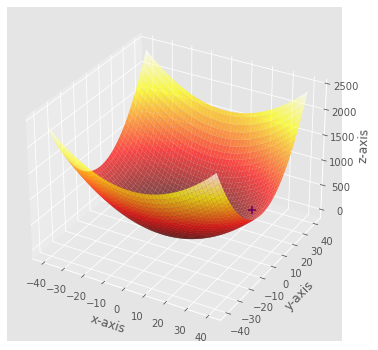

In [32]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(6,15))
ax = fig.gca(projection='3d')   # Create the axes

# Data
X = np.linspace(-40, 40, 100)
Y = np.linspace(-40, 40, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the 3d surface

surface = ax.plot_surface(X, Y, Z,                  
                          rstride = 2,
                          cstride = 2,
                          alpha = .7,
                          cmap=cm.hot, 
                          linewidth=0, 
                          antialiased=True)

ax.scatter(30,10,f(30,10), marker='+', zorder=10, c="b",s=50)


# Set some labels
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Let’s assume we are interested in a gradient at point $p(10,10)$:

$$
\dfrac{\partial f}{\partial x}(x,y)=x \\\\\\\\\\\
\\\\\

\dfrac{\partial f}{\partial y}(x,y)=2y\\

$$


$$
\nabla f(x,y)=\left[\begin{array}{c}
\dfrac{\partial f}{\partial x_1}(p) \\\\

\dfrac{\partial f}{\partial x_2}(p) 
\end{array}\right]
$$



so consequently:

$$\nabla f(x,y)=\left[\begin{array}{c}
 x \\
 2y \\

\end{array}\right]

\\\\\\
$$



$$
 \nabla f(10,10)=\left[
\begin{array}{c}
10 \\
20 \\
\end{array}\right]$$

By looking at these values we conclude that the slope is twice steeper along the y axis.


## Gradient Descent

Gradient Descent Algorithm iteratively calculates the next point using gradient at the current position, then scales it (by a learning rate) and subtracts obtained value from the current position (makes a step).

It subtracts the value because we want to minimise the function (to maximise it would be adding). 
 
In our case,the function we would like to minimize and very frequently is the <a href="#loss">loss function</a>.
This process can be written as:

$$ \theta_{j} := \theta_{j} - \alpha\dfrac{\partial}{\partial \theta}J(\theta) $$


$$0 \leq j\leq n $$ 

 There’s an important parameter $\alpha$ which scales the gradient and thus controls the step size. 

In machine learning, it is called **learning rate** and have a strong influence on performance.

- The smaller learning rate the longer GD converges, or may reach maximum iteration before reaching the optimum point

- If learning rate is too big the algorithm may not converge to the optimal point (jump around) or even to diverge completely.

<h4  style="font-family: Arial; font-size:1.4em;color:gold;"> How de we compute the Gradient of the loss function then ? </h4>

After defining the concepts above, we ended up with 3 main equations : 

The hypothesis equation :
$$
\hat{y} = h_{\theta}(X) = \theta_{0} + \theta_{1}X  \tag{1}
$$

The cost/loss function :
$$
 J(\theta) =  \frac{1}{2m} \sum_{i=0}^m(h_{\theta}(X^{(i)}) - y^{(i)}) ^2  \tag{2}
$$

The gradient descent : 

$$
\theta_{j} := \theta_{j} - \alpha\dfrac{\partial}{\partial \theta}J(\theta)  \tag{3}
$$

By substituting $1^{st}$ in $2^{nd}$ and then $2^{nd}$ in $3^{rd}$, we get :


$$
\theta_{j} := \theta_{j} - \alpha\frac{1}{2m} \sum_{i=0}^m(h_{\theta}(X^{(i)}) - y^{(i)}) X_{j}^{(i)} \tag{4}
$$
In our Gradient Descent algorithm, we will repeat $(4)$ for $m$ samples in the training set, in each iteration $j$ until finding local minima.

The goal is to make it converge.


For a more intuitive notation, we can rewrite the hypothesis equation such as : 

$$
h_{\theta}(X) = \beta + \theta X  \tag{1}
$$

- $\beta$ being the bias (the y-intercept), sometimes referred to as $\theta_{0}$ 
- $\theta$ being the weight,
- $X$ the vector of features (from 1 to $n$)

# 💰 Work on Real Data

In this notebook, we would like to predict the benefice of a firm in different towns by focusing on these towns' inhabitants.

To do so, we will study the case of a set of given data with :
- $y$ being the benefice,
- $X$ inhabitants features.

We'll be using **Gradient Descent** method for prediction.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [51]:
df_houses = pd.read_csv('data/houses.csv')

In [52]:
df_houses.head()

,population,benefice
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [53]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   benefice    97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


## Defining X and y

In [199]:
X = df_houses['population'].values
X[:5]

array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598])

In [88]:
y = df_houses['benefice'].values
y[:5]

array([17.592 ,  9.1302, 13.662 , 11.854 ,  6.8233])

Text(0, 0.5, 'Benefice x 1000')

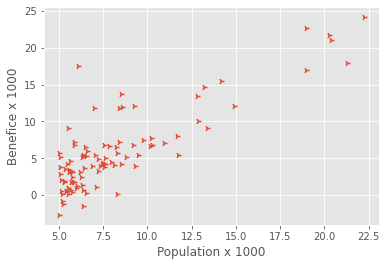

In [87]:
plt.scatter(x=df_houses['population'],y=df_houses['benefice'],marker="4")
plt.xlabel('Population x 1000')
plt.ylabel('Benefice x 1000')

We can clearly see that there may be a line passing through some these points.

In our first part of the work, we're going to find the parameters $(\theta_{0},\theta_{1})$ because the equation of the line is in the form of $y=\theta_{0} + \theta_{1}x$.

But how do we choose these values at the first iteration ? 
Generally, they are randomly generated or set to zero.


In [96]:
import random
def initialize(n_features: int, is_random=True):
  """
  Returns bias and weight for a vector X of n features.
  n has to be greater or equal to 1.
  
  Parameters:
  n_features: number of features of X. If errors occur, reshape(-1,1) your vector.
  is_random: if set to False, will set values of bias and theta to zero.
  """
  if is_random:
    theta_0 = random.random()
    theta = np.random.rand(n_features)
  else:
    theta_0 = 0
    theta = np.zeros(shape=n_features)
  return theta_0,theta

In [97]:
theta_0,theta_1 = initialize(X.shape[1],is_random=True)
theta_0,theta_1

IndexError: tuple index out of range

In [142]:
X.shape

(97,)

As you can see, this is raising an error because the shape of our features vector is $(97,)$.

- When it comes to Single-Feature Regression, we always ``reshape(-1,1)`` our features vector so it becomes a column-vector in order to make the dot product possible.

Since the equation $y=\theta_{0} + \theta_{1}x$., $\theta_{0}$ is implicitly multiplied by 1. 

Put another way consider the $i^{th} (x,y)$ pair :

$$y^{(i)} = \theta_{0} + \theta_{1}x^{(i)} \iff y^{(i)} = \theta_{0} \times 1 + \theta_{1}x^{(i)} \\$$

- Another way of dealing with this problem is to add a column of ones to the single-feature X vector.

However, these two methods are not equivalent if we go by ploting two regression lines having the same parameters generated randomly.

In [155]:
X_reshaped = X.reshape(-1,1)
X_reshaped.shape

(97, 1)

In [184]:
theta_0,theta_1 = initialize(X_reshaped.shape[1],is_random=True)

In [185]:
theta = np.append(theta_0,theta_1)
print('bias = {}, weight = {}'.format(theta[0],theta[1]))

bias = 0.8569214682833948, weight = 0.9597061881215099


In [186]:
X_stacked = np.vstack((np.ones(len(y)), X.T)).T
X_stacked.shape

(97, 2)

In [229]:
def predict_Y(X,theta):
  return np.sum(np.multiply(X,theta), axis=1)

In [188]:
y_pred_reshaped = predict_Y(X_reshaped,theta)
y_pred_stacked = predict_Y(X_stacked,theta)

In [189]:
y_pred_stacked.shape

(97,)

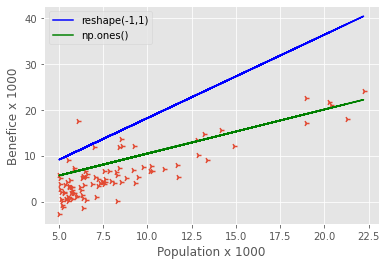

In [190]:
plt.scatter(x=df_houses['population'],y=df_houses['benefice'],marker="4")
plt.plot(X,y_pred_reshaped,c='blue',label="reshape(-1,1)")
plt.plot(X,y_pred_stacked,c='green',label="np.ones()")
plt.xlabel('Population x 1000')
plt.ylabel('Benefice x 1000')
plt.legend()

The ``np.ones()`` method however *"touches"* more points. We're going to work with that method then.

In [200]:
df_houses.shape

(97, 2)

In [202]:
intercept = np.ones(len(y))
X = np.vstack((intercept, X.T)).T

We now have this shape for X input vector.

In [204]:
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [210]:
y_hat = np.sum(np.multiply(X,theta), axis=1)

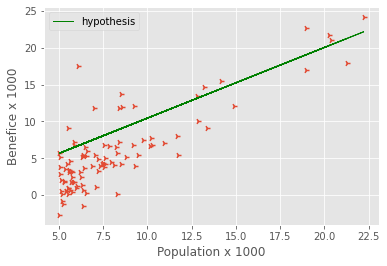

In [238]:
plt.scatter(X[:,[1]], y,marker="4")
plt.plot(X[:,[1]], y_hat, color='green', linewidth=1,label="hypothesis")
plt.xlabel('Population x 1000')
plt.ylabel('Benefice x 1000')
plt.legend()

This model, obviously, does not fit our data. As highlighted by the blue lines connecting dots with the red line, the Hypothesis *“touches”* some of the y values, but the rest of the $h_{\theta}$ vector is far from the minimum. So we are tempted to guess which $\theta$ could predict $y$ when setting with different values. We could choose $\theta$ “by trial and error” to minimize all the distances between the Hypothesis and y. 

To accomplish this goal, we can calculate the Cost Function for our model.

## Cost function

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [85]:
def computeCostNonVect(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    pass
    

In [ ]:
def gradient_descent(x, y, iterations, r):
    t0 = t1 = 0                                                                 # t0 = y-intercept, t1 = gradient
    m = len(x)                                                                  # Number of training examples
    h = 0                                                                       # Initialize 0 to the hypothesis
    cost = 0
    print("Learning Rate = ", r)
    print('Number of Iterations = ', iterations)
    for i in range(iterations):
        h = t0 + (t1 * x)                                                       # Set hypothesis
        cost = (1/(2 * m)) * sum([val**2 for val in (h - y)])                   # Calculate cost
        t0 = t0 - r * (1 / m) * sum(h - y)                                      # Partial derivative of t0 and update t0
        t1 = t1 - r * (1 / m) * sum((h - y) * x)                                # Partial derivative of t1 and update t1
        print("i={}, cost={}, t0={}, t1={}".format(i, cost, t0, t1))
    plot_hypothesis(x, y, h, 'year', 'life expectancy', 'Malaysian Males Life Expectancy At Birth')
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.plot_trisurf(cost, t1, t0, colot='None', alpha=0.5)
    # ax.set_xlabel('J(\u03B80,\u03B81)')
    # ax.set_ylabel('\u03B81')
    # ax.set_zlabel('\u03B80')

# main()
# x = year
x = np.array([1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])
# y = life expectancy at birth
y = np.array([63.1, 63.5, 63.3, 63.8, 61.6, 62.6, 62.8, 63.2, 63.6, 64.3, 64.7, 65.3, 65.6, 65.8, 66.4, 66.9, 67.1, 67.1, 67.2, 67.7, 68.2, 68.5, 68.7, 68.8, 68.9, 69.2, 69.4, 69.6, 69.6, 69.5, 69.5, 69.7, 69.5, 69.7, 70, 70.6, 70.7, 70.8, 71.1, 71.4, 71.6, 71.6, 71.6, 71.7, 71.9, 72.1, 72.2, 72.4, 72.5, 72.5])

scatter_plot(x, y, 'year', 'life expectancy', 'Malaysian Males Life Expectancy At Birth')
plt.show()

gradient_descent(x, y, 100, 0.0000001) 

In [10]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    pass

In [28]:
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)

## Gradient Descent Implementation

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [11]:
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    pass

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
def gradient_descent(X, y, lr=0.05, epoch=10):
    
    '''
    Gradient Descent for a single feature
    '''
    
    m, b = 0.33, 0.48 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(X) # number of samples
    
    for _ in range(epoch):
                
        f = y - (m*X + b)
    
        # Updating m and b
        m -= lr * (-2 * X.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, (m*X + b)))        
    
    return m, b, log, mse
  
  

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [12]:
theta = np.zeros((2, 1))

Calculer le cout initial

In [13]:
initialCost=computeCost(X, y, theta)

Appel des la fonction de calcul du gradient

In [14]:
# paramètres
iterations = 1500;
alpha = 0.01;
# Appel
theta = gradientDescent(X, y, theta, alpha, iterations);

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

In [ ]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

Prédire des valeurs de y

In [ ]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta);
predict1

In [ ]:
predict2 = np.matmul([1, 7],theta);
predict2

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [ ]:
df_houses = pd.read_csv('data/house_multi.csv')

In [ ]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)
dataMulti.shape

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [ ]:
# d'abord créer X et y


In [ ]:
# redéfinissez vos fonctions de coût si cela est necessaire


Mise à l'échelle des données

Normalisation des données en moyenne = 0

Appliquer la descente du gradient à plusieurs variables

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# 📚Ressources :

1. *Gradient Descent Algorithm step by step*,https://towardsdatascience.com/complete-step-by-step-gradient-descent-algorithm-from-scratch-acba013e8420
2. *Gradient Descent From Scratch*, https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc
3. *Gradient Descent Algorithm, a deep dive*,https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21
4. *Gradient Descent Algorithm in Python from Scratch*,https://towardsdatascience.com/implementing-gradient-descent-in-python-from-scratch-760a8556c31f
5. *Cost Function and Gradient Descent*, https://towardsdatascience.com/machine-leaning-cost-function-and-gradient-descend-75821535b2ef
6. *Linear Regression with one or more variables*,https://towardsdatascience.com/machine-learning-for-biomedical-data-linear-regression-7d43461cdfa9